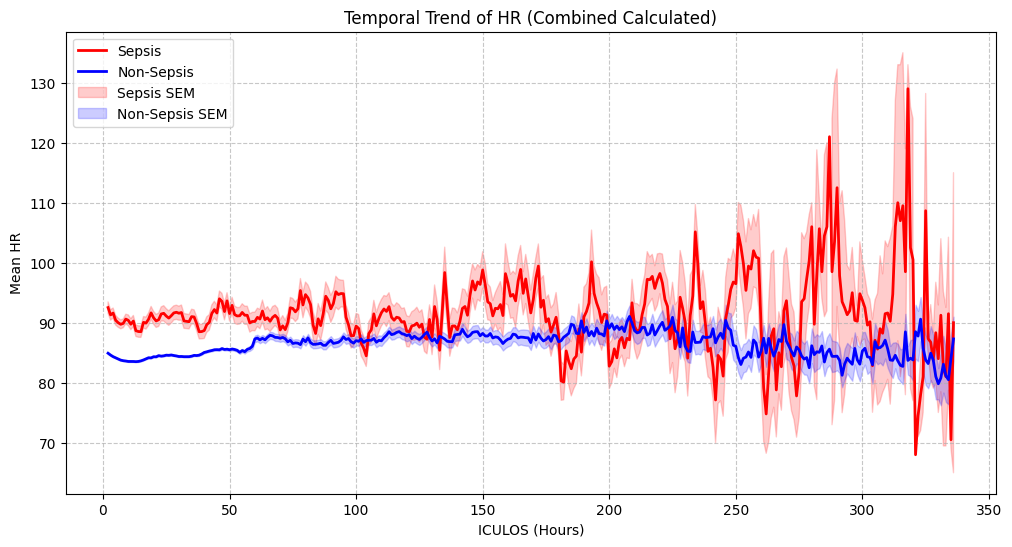

✅ Temporal trend plot for HR saved
✅ Temporal trend plot for O2Sat saved
✅ Temporal trend plot for Temp saved
✅ Temporal trend plot for SBP saved
✅ Temporal trend plot for MAP saved
✅ Temporal trend plot for DBP saved
✅ Temporal trend plot for Resp saved


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# 📌 Function to plot temporal trends with additional statistics
def plot_temporal_trends(df, feature, plots_dir="../Plots/temporal_trends", dataset_name="Combined Calculated"):
    """
    Plot temporal trends of a feature for sepsis vs. non-sepsis patients over ICULOS.
    """
    # Calculate mean trends
    sepsis_trend = df[df['SepsisLabel'] == 1].groupby('ICULOS')[feature].mean()
    non_sepsis_trend = df[df['SepsisLabel'] == 0].groupby('ICULOS')[feature].mean()
    
    # Calculate standard error for confidence (optional shaded area)
    sepsis_sem = df[df['SepsisLabel'] == 1].groupby('ICULOS')[feature].sem()
    non_sepsis_sem = df[df['SepsisLabel'] == 0].groupby('ICULOS')[feature].sem()
    
    # Skip if no data to plot
    if sepsis_trend.empty or non_sepsis_trend.empty:
        print(f"⚠️ No sufficient data to plot temporal trend for '{feature}'")
        return
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    plt.plot(sepsis_trend.index, sepsis_trend, label="Sepsis", color="red", linewidth=2)
    plt.plot(non_sepsis_trend.index, non_sepsis_trend, label="Non-Sepsis", color="blue", linewidth=2)
    
    # Optional: Add shaded standard error regions
    plt.fill_between(sepsis_trend.index, sepsis_trend - sepsis_sem, sepsis_trend + sepsis_sem, 
                     color="red", alpha=0.2, label="Sepsis SEM")
    plt.fill_between(non_sepsis_trend.index, non_sepsis_trend - non_sepsis_sem, non_sepsis_trend + non_sepsis_sem, 
                     color="blue", alpha=0.2, label="Non-Sepsis SEM")
    
    # Customize plot
    plt.xlabel("ICULOS (Hours)")
    plt.ylabel(f"Mean {feature}")
    plt.title(f"Temporal Trend of {feature} ({dataset_name})")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Save plot
    os.makedirs(plots_dir, exist_ok=True)
    plt.savefig(os.path.join(plots_dir, f"trend_{feature}.png"), bbox_inches="tight", dpi=300)
    if feature == 'HR':
        plt.show()
    print(f"✅ Temporal trend plot for {feature} saved")
    plt.close()

# 📌 Load datasets from .psv files
folder_a = "training_setA"
folder_b = "training_setB"

# Define relevant feature columns (indexes start from 0)
feature_columns = list(range(8)) + list(range(8, 34))

def load_data(folder):
    data_frames = []
    for filename in os.listdir(folder):
        if filename.endswith(".psv"):
            file_path = os.path.join(folder, filename)
            df = pd.read_csv(file_path, sep='|')
            data_frames.append(df)
    return pd.concat(data_frames, ignore_index=True)

df_a = load_data(folder_a)
df_b = load_data(folder_b)
df = pd.concat([df_a, df_b], ignore_index=True)

# Define features including PP
raw_features = [
    'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp'
]

# Filter features present in the dataset
available_features = [f for f in raw_features if f in df.columns]
missing_features = [f for f in raw_features if f not in df.columns]

# Create directory for plots
plots_dir = "./Plots/temporal_trends"
os.makedirs(plots_dir, exist_ok=True)

# Plot temporal trends for each feature
for feature in available_features:
    plot_temporal_trends(df, feature, plots_dir=plots_dir, dataset_name="Combined Calculated")